Based on all previous experience, trying out different various architectuers and parameters, val loss ~0.07

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')
mean = float_data[:2501].mean(axis=0)
std = float_data[:2501].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
lookback = 45
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3] ##### HIT KURDE 1 to numer kolumny ktora przewiduje wtf
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2501,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3001 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

Best model, 80 neurons

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(80,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(5,
  activation='softmax',))
model.add(layers.Dense(1,))
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 48s 114ms/step - loss: 0.8394 - val_loss: 1.0211
Epoch 2/200
400/400 [==============================] - 35s 87ms/step - loss: 0.5279 - val_loss: 0.4352
Epoch 3/200
400/400 [==============================] - 35s 88ms/step - loss: 0.2468 - val_loss: 0.1505
Epoch 4/200
400/400 [==============================] - 36s 89ms/step - loss: 0.1355 - val_loss: 0.0883
Epoch 5/200
400/400 [==============================] - 45s 112ms/step - loss: 0.0955 - val_loss: 0.0704
Epoch 6/200
400/400 [==============================] - 35s 88ms/step - loss: 0.0837 - val_loss: 0.0664
Epoch 7/200
400/400 [==============================] - 39s 97ms/step - loss: 0.0796 - val_loss: 0.0639
Epoch 8/200
400/400 [==============================] - 37s 92ms/step - loss: 0.0776 - val_loss: 0.0627
Epoch 9/200
400/400 [==============================] - 35s 88ms/step - loss: 0.0752 - val_loss: 0.0648
Epoch 10/200
400/400 [==============================] - 35s 89ms/step -

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)
eval *std[3]

511/511 [==============================] - 9s 18ms/step - loss: 0.0845


0.03153506543522755

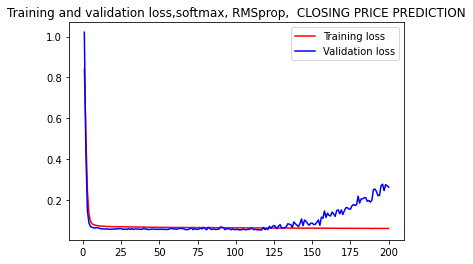

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Different architecture

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(50,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.GRU(25,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.Dense(1,))
model1.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history1 = model1.fit(train_gen,
  steps_per_epoch=400,
  epochs=100,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/100
400/400 [==============================] - 57s 130ms/step - loss: 0.8065 - val_loss: 0.8631
Epoch 2/100
400/400 [==============================] - 45s 113ms/step - loss: 0.4346 - val_loss: 0.2323
Epoch 3/100
400/400 [==============================] - 47s 117ms/step - loss: 0.2033 - val_loss: 0.1343
Epoch 4/100
400/400 [==============================] - 46s 115ms/step - loss: 0.1329 - val_loss: 0.1301
Epoch 5/100
400/400 [==============================] - 48s 121ms/step - loss: 0.1064 - val_loss: 0.1183
Epoch 6/100
400/400 [==============================] - 47s 117ms/step - loss: 0.0949 - val_loss: 0.1335
Epoch 7/100
400/400 [==============================] - 46s 116ms/step - loss: 0.0894 - val_loss: 0.1450
Epoch 8/100
400/400 [==============================] - 45s 113ms/step - loss: 0.0857 - val_loss: 0.1567
Epoch 9/100
400/400 [==============================] - 46s 115ms/step - loss: 0.0831 - val_loss: 0.1613
Epoch 10/100
400/400 [==============================] - 48s 119m

In [ ]:
eval1 = model1.evaluate(test_gen, steps = test_steps)
eval1 *std[3]

511/511 [==============================] - 10s 19ms/step - loss: 0.2871


0.10720013018852992

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
del model2

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.LSTM(500,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='sigmoid',
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(1,))
model2.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=200,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
200/200 [==============================] - 315s 2s/step - loss: 0.3110 - val_loss: 0.1565
Epoch 2/40
200/200 [==============================] - 311s 2s/step - loss: 0.1576 - val_loss: 0.0863
Epoch 3/40
200/200 [==============================] - 308s 2s/step - loss: 0.1309 - val_loss: 0.1123
Epoch 4/40
200/200 [==============================] - 314s 2s/step - loss: 0.1165 - val_loss: 0.0714
Epoch 5/40
200/200 [==============================] - 308s 2s/step - loss: 0.1045 - val_loss: 0.0780
Epoch 6/40
200/200 [==============================] - 305s 2s/step - loss: 0.0978 - val_loss: 0.1053
Epoch 7/40
200/200 [==============================] - 309s 2s/step - loss: 0.0909 - val_loss: 0.1261
Epoch 8/40
200/200 [==============================] - 311s 2s/step - loss: 0.0882 - val_loss: 0.0764
Epoch 9/40
200/200 [==============================] - 312s 2s/step - loss: 0.0840 - val_loss: 0.0774
Epoch 10/40
200/200 [==============================] - 308s 2s/step - loss: 0.0811 - val_lo

In [ ]:
eval2 = model2.evaluate(test_gen, steps = test_steps)
eval2 *std[3]

511/511 [==============================] - 114s 223ms/step - loss: 0.2229


0.0832260043360189

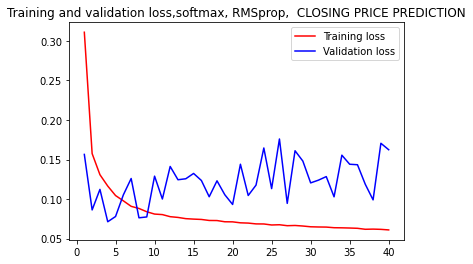

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(layers.LSTM(48,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.Dense(64,
  activation='softmax',))
model3.add(layers.Dense(1,))
model3.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history3 = model3.fit(train_gen,
  steps_per_epoch=200,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
200/200 [==============================] - 20s 77ms/step - loss: 0.8558 - val_loss: 1.1611
Epoch 2/40
200/200 [==============================] - 15s 75ms/step - loss: 0.7981 - val_loss: 0.9527
Epoch 3/40
200/200 [==============================] - 15s 74ms/step - loss: 0.6403 - val_loss: 0.7342
Epoch 4/40
200/200 [==============================] - 15s 74ms/step - loss: 0.4670 - val_loss: 0.5077
Epoch 5/40
200/200 [==============================] - 15s 74ms/step - loss: 0.3153 - val_loss: 0.2816
Epoch 6/40
200/200 [==============================] - 15s 74ms/step - loss: 0.2255 - val_loss: 0.1543
Epoch 7/40
200/200 [==============================] - 15s 75ms/step - loss: 0.1609 - val_loss: 0.1567
Epoch 8/40
200/200 [==============================] - 15s 75ms/step - loss: 0.1269 - val_loss: 0.1361
Epoch 9/40
200/200 [==============================] - 16s 78ms/step - loss: 0.1017 - val_loss: 0.1177
Epoch 10/40
200/200 [==============================] - 16s 80ms/step - loss: 0.089

In [ ]:
eval3 = model3.evaluate(test_gen, steps = test_steps)
eval3 *std[3]

511/511 [==============================] - 8s 15ms/step - loss: 0.3141


0.1172757523669894

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(layers.LSTM(100,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.GRU(3,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.Dense(1,))
model4.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history4 = model4.fit(train_gen,
  steps_per_epoch=200,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
200/200 [==============================] - 77s 292ms/step - loss: 0.8609 - val_loss: 1.2041
Epoch 2/40
200/200 [==============================] - 57s 286ms/step - loss: 0.7820 - val_loss: 0.8700
Epoch 3/40
200/200 [==============================] - 56s 279ms/step - loss: 0.5321 - val_loss: 0.5216
Epoch 4/40
200/200 [==============================] - 56s 279ms/step - loss: 0.3399 - val_loss: 0.2780
Epoch 5/40
200/200 [==============================] - 55s 275ms/step - loss: 0.2519 - val_loss: 0.1668
Epoch 6/40
200/200 [==============================] - 55s 275ms/step - loss: 0.1946 - val_loss: 0.1611
Epoch 7/40
200/200 [==============================] - 55s 276ms/step - loss: 0.1610 - val_loss: 0.1555
Epoch 8/40
200/200 [==============================] - 55s 276ms/step - loss: 0.1344 - val_loss: 0.1259
Epoch 9/40
200/200 [==============================] - 55s 277ms/step - loss: 0.1182 - val_loss: 0.1073
Epoch 10/40
200/200 [==============================] - 57s 286ms/step - l

KeyboardInterrupt: ignored

In [ ]:
del model5

Same as above, but longer

In [ ]:
model5 = tf.keras.models.Sequential()
model5.add(layers.LSTM(3,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.LSTM(6,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.Dense(1,))
model5.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.1), loss='mae')
history5 = model5.fit(train_gen,
  steps_per_epoch=200,
  epochs=100,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/100
200/200 [==============================] - 26s 107ms/step - loss: 0.2778 - val_loss: 0.3849
Epoch 2/100
200/200 [==============================] - 21s 106ms/step - loss: 0.1967 - val_loss: 0.4249
Epoch 3/100
200/200 [==============================] - 21s 105ms/step - loss: 0.1693 - val_loss: 0.2056
Epoch 4/100
200/200 [==============================] - 21s 107ms/step - loss: 0.1609 - val_loss: 0.2967
Epoch 5/100
200/200 [==============================] - 23s 117ms/step - loss: 0.1572 - val_loss: 0.1273
Epoch 6/100
200/200 [==============================] - 21s 107ms/step - loss: 0.1525 - val_loss: 0.3528
Epoch 7/100
200/200 [==============================] - 21s 105ms/step - loss: 0.1510 - val_loss: 0.2476
Epoch 8/100
200/200 [==============================] - 21s 106ms/step - loss: 0.1480 - val_loss: 0.2365
Epoch 9/100
200/200 [==============================] - 21s 106ms/step - loss: 0.1465 - val_loss: 0.1683
Epoch 10/100
200/200 [==============================] - 21s 105m

In [ ]:
eval5 = model5.evaluate(test_gen, steps = test_steps)
eval5 *std[3]

496/496 [==============================] - 9s 18ms/step - loss: 0.1508


0.05629136877098917

In [ ]:
model6 = tf.keras.models.Sequential()
model6.add(layers.LSTM(15,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.LSTM(20,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.Dense(1,))
model6.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')
history6= model6.fit(train_gen,
  steps_per_epoch=200,
  epochs=400,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/400
200/200 [==============================] - 68s 137ms/step - loss: 0.3455 - val_loss: 0.1453
Epoch 2/400
200/200 [==============================] - 27s 135ms/step - loss: 0.0993 - val_loss: 0.0849
Epoch 3/400
200/200 [==============================] - 27s 135ms/step - loss: 0.0890 - val_loss: 0.0880
Epoch 4/400
200/200 [==============================] - 27s 134ms/step - loss: 0.0824 - val_loss: 0.0669
Epoch 5/400
200/200 [==============================] - 27s 134ms/step - loss: 0.0825 - val_loss: 0.0985
Epoch 6/400
200/200 [==============================] - 27s 136ms/step - loss: 0.0791 - val_loss: 0.0602
Epoch 7/400
200/200 [==============================] - 27s 135ms/step - loss: 0.0788 - val_loss: 0.0582
Epoch 8/400
200/200 [==============================] - 27s 134ms/step - loss: 0.0785 - val_loss: 0.0597
Epoch 9/400
200/200 [==============================] - 27s 135ms/step - loss: 0.0770 - val_loss: 0.0618
Epoch 10/400
200/200 [==============================] - 27s 136m

In [ ]:
del  model6

kernel regularizer l1_l2 - not working

In [ ]:
eval6 = model6.evaluate(test_gen, steps = test_steps)
eval6 *std[3]

496/496 [==============================] - 11s 23ms/step - loss: 0.1090


0.04069962116852266

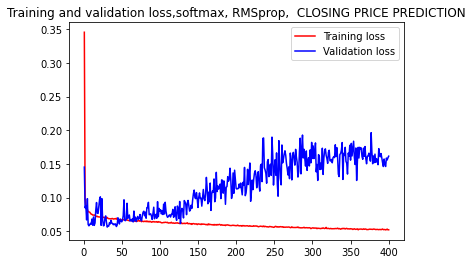

In [ ]:
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
epochs6 = range(1, len(loss6) + 1)
plt.figure()
plt.plot(epochs6, loss6, 'r', label='Training loss')
plt.plot(epochs6, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model7 = tf.keras.models.Sequential()
model7.add(layers.LSTM(20,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model7.add(layers.LSTM(30,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model7.add(layers.Dense(1,))
model7.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')
history7= model7.fit(train_gen,
  steps_per_epoch=200,
  epochs=100,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/100
200/200 [==============================] - 44s 186ms/step - loss: 0.3731 - val_loss: 0.1242
Epoch 2/100
200/200 [==============================] - 36s 182ms/step - loss: 0.0980 - val_loss: 0.1340
Epoch 3/100
200/200 [==============================] - 36s 178ms/step - loss: 0.0868 - val_loss: 0.0917
Epoch 4/100
200/200 [==============================] - 36s 181ms/step - loss: 0.0841 - val_loss: 0.1257
Epoch 5/100
200/200 [==============================] - 34s 173ms/step - loss: 0.0808 - val_loss: 0.1278
Epoch 6/100
200/200 [==============================] - 35s 176ms/step - loss: 0.0787 - val_loss: 0.0860
Epoch 7/100
200/200 [==============================] - 35s 175ms/step - loss: 0.0781 - val_loss: 0.1266
Epoch 8/100
200/200 [==============================] - 36s 183ms/step - loss: 0.0754 - val_loss: 0.0968
Epoch 9/100
200/200 [==============================] - 37s 184ms/step - loss: 0.0752 - val_loss: 0.0970
Epoch 10/100
200/200 [==============================] - 37s 183m

In [ ]:
eval7 = model7.evaluate(test_gen, steps = test_steps)
eval7 *std[3]

496/496 [==============================] - 20s 40ms/step - loss: 0.0778


0.029066760165336936

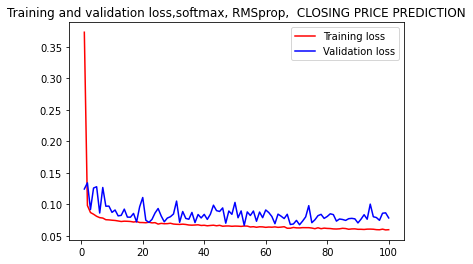

In [ ]:
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']
epochs7 = range(1, len(loss7) + 1)
plt.figure()
plt.plot(epochs7, loss7, 'r', label='Training loss')
plt.plot(epochs7, val_loss7, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model8 = tf.keras.models.Sequential()
model8.add(layers.LSTM(25,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.LSTM(40,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.Dense(1,))
model8.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')
history8 = model8.fit(train_gen,
  steps_per_epoch=200,
  epochs=100,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/100
200/200 [==============================] - 41s 178ms/step - loss: 0.4118 - val_loss: 0.1496
Epoch 2/100
200/200 [==============================] - 36s 179ms/step - loss: 0.1015 - val_loss: 0.0716
Epoch 3/100
200/200 [==============================] - 37s 187ms/step - loss: 0.0875 - val_loss: 0.0967
Epoch 4/100
200/200 [==============================] - 35s 174ms/step - loss: 0.0827 - val_loss: 0.0951
Epoch 5/100
200/200 [==============================] - 36s 181ms/step - loss: 0.0806 - val_loss: 0.0888
Epoch 6/100
200/200 [==============================] - 36s 178ms/step - loss: 0.0786 - val_loss: 0.0771
Epoch 7/100
200/200 [==============================] - 37s 186ms/step - loss: 0.0781 - val_loss: 0.0632
Epoch 8/100
200/200 [==============================] - 37s 184ms/step - loss: 0.0774 - val_loss: 0.0721
Epoch 9/100
200/200 [==============================] - 37s 187ms/step - loss: 0.0761 - val_loss: 0.0627
Epoch 10/100
200/200 [==============================] - 37s 187m

In [ ]:
eval8 = model8.evaluate(test_gen, steps = test_steps)
eval8 *std[3]

496/496 [==============================] - 13s 27ms/step - loss: 0.0904


0.0337655113016615

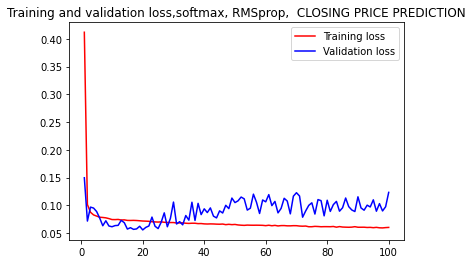

In [ ]:
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']
epochs8 = range(1, len(loss8) + 1)
plt.figure()
plt.plot(epochs8, loss8, 'r', label='Training loss')
plt.plot(epochs8, val_loss8, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model9 = tf.keras.models.Sequential()
model9.add(layers.LSTM(30,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.LSTM(50,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.Dense(1,))
model9.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')
history9 = model9.fit(train_gen,
  steps_per_epoch=200,
  epochs=50,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/50
200/200 [==============================] - 47s 209ms/step - loss: 0.4473 - val_loss: 0.1828
Epoch 2/50
200/200 [==============================] - 44s 218ms/step - loss: 0.1082 - val_loss: 0.1406
Epoch 3/50
200/200 [==============================] - 42s 212ms/step - loss: 0.0932 - val_loss: 0.1216
Epoch 4/50
200/200 [==============================] - 43s 215ms/step - loss: 0.0879 - val_loss: 0.0957
Epoch 5/50
200/200 [==============================] - 43s 213ms/step - loss: 0.0842 - val_loss: 0.0951
Epoch 6/50
200/200 [==============================] - 42s 210ms/step - loss: 0.0823 - val_loss: 0.0808
Epoch 7/50
200/200 [==============================] - 42s 213ms/step - loss: 0.0806 - val_loss: 0.0813
Epoch 8/50
200/200 [==============================] - 43s 214ms/step - loss: 0.0790 - val_loss: 0.0784
Epoch 9/50
200/200 [==============================] - 41s 207ms/step - loss: 0.0774 - val_loss: 0.0813
Epoch 10/50
200/200 [==============================] - 42s 208ms/step - l

In [ ]:
eval9 = model9.evaluate(test_gen, steps = test_steps)
eval9 *std[3]

496/496 [==============================] - 25s 51ms/step - loss: 0.0771


0.028769403918979197

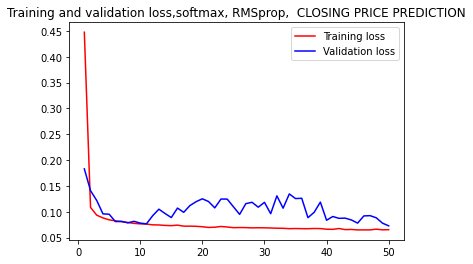

In [ ]:
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']
epochs9 = range(1, len(loss9) + 1)
plt.figure()
plt.plot(epochs9, loss9, 'r', label='Training loss')
plt.plot(epochs9, val_loss9, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model10 = tf.keras.models.Sequential()
model10.add(layers.Dense(64,))
model10.add(layers.LSTM(32,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model10.add(layers.LSTM(16,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model10.add(layers.Dense(8,))
model10.add(layers.Dense(1,))
model10.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')
history10 = model10.fit(train_gen,
  steps_per_epoch=200,
  epochs=50,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/50
200/200 [==============================] - 46s 197ms/step - loss: 0.3028 - val_loss: 0.0926
Epoch 2/50
200/200 [==============================] - 41s 207ms/step - loss: 0.1025 - val_loss: 0.1283
Epoch 3/50
200/200 [==============================] - 42s 211ms/step - loss: 0.0889 - val_loss: 0.1141
Epoch 4/50
200/200 [==============================] - 41s 206ms/step - loss: 0.0830 - val_loss: 0.1206
Epoch 5/50
200/200 [==============================] - 42s 209ms/step - loss: 0.0794 - val_loss: 0.0893
Epoch 6/50
200/200 [==============================] - 42s 209ms/step - loss: 0.0774 - val_loss: 0.0822
Epoch 7/50
200/200 [==============================] - 41s 206ms/step - loss: 0.0758 - val_loss: 0.0831
Epoch 8/50
200/200 [==============================] - 41s 206ms/step - loss: 0.0755 - val_loss: 0.0954
Epoch 9/50
200/200 [==============================] - 41s 205ms/step - loss: 0.0723 - val_loss: 0.0912
Epoch 10/50
200/200 [==============================] - 41s 207ms/step - l

In [ ]:
eval10 = model10.evaluate(test_gen, steps = test_steps)
eval10 *std[3]

496/496 [==============================] - 13s 26ms/step - loss: 0.0788


0.029421393285425923

In [ ]:
del model11

In [ ]:
model11 = tf.keras.models.Sequential()
model11.add(layers.LSTM(128,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.LSTM(2,
  dropout=0.1,
  recurrent_dropout=0.1,
  activation='softmax',
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.Dense(1,))
model11.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.01), loss='mae')
history11 = model11.fit(train_gen,
  steps_per_epoch=200,
  epochs=50,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/50
200/200 [==============================] - 90s 419ms/step - loss: 0.3288 - val_loss: 0.1318
Epoch 2/50
200/200 [==============================] - 85s 426ms/step - loss: 0.1136 - val_loss: 0.0900
Epoch 3/50
200/200 [==============================] - 86s 429ms/step - loss: 0.1011 - val_loss: 0.0847
Epoch 4/50
200/200 [==============================] - 89s 447ms/step - loss: 0.0952 - val_loss: 0.0802
Epoch 5/50
200/200 [==============================] - 86s 431ms/step - loss: 0.0920 - val_loss: 0.0638
Epoch 6/50
200/200 [==============================] - 86s 430ms/step - loss: 0.0899 - val_loss: 0.0656
Epoch 7/50
200/200 [==============================] - 88s 442ms/step - loss: 0.0878 - val_loss: 0.0949
Epoch 8/50
200/200 [==============================] - 87s 435ms/step - loss: 0.0864 - val_loss: 0.1142
Epoch 9/50
200/200 [==============================] - 89s 444ms/step - loss: 0.0854 - val_loss: 0.0793
Epoch 10/50
200/200 [==============================] - 84s 420ms/step - l